In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
X_train = np.linspace(start = 0, stop = 1, num = 16)
y_train = (X_train - 0.5) ** 2

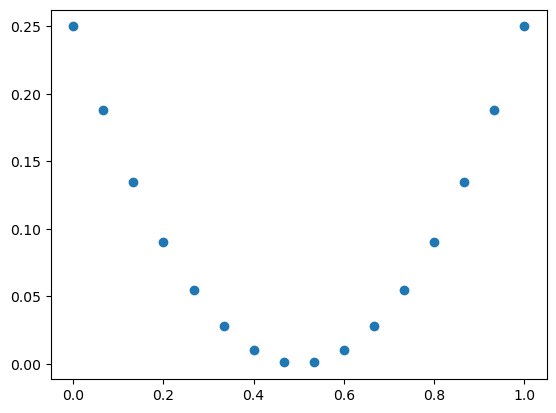

In [3]:
plt.scatter(X_train, y_train)
plt.show()

In [4]:
dtr = DecisionTreeRegressor(max_leaf_nodes = 5)
dtr.fit(X_train.reshape(16,1),y_train)

DecisionTreeRegressor(max_leaf_nodes=5)

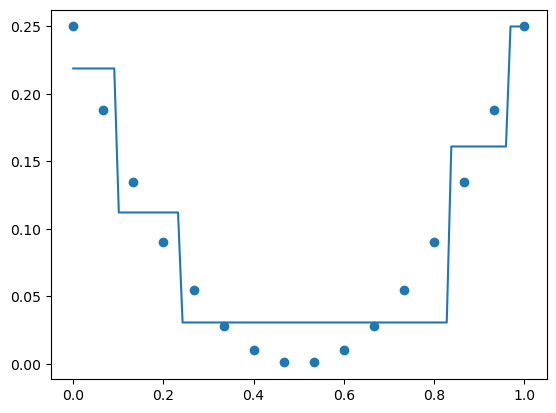

In [5]:
X_test = np.linspace(0,1,100)
y_pred = dtr.predict(X_test.reshape(100,1))

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()

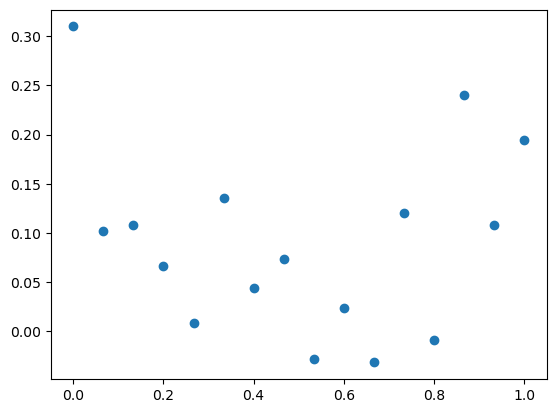

In [6]:
X_train = np.linspace(start = 0, stop = 1, num = 16)
y_train = (X_train - 0.5) ** 2 + np.random.normal(loc=0,scale=0.1,size=16)

plt.scatter(X_train, y_train)
plt.show()

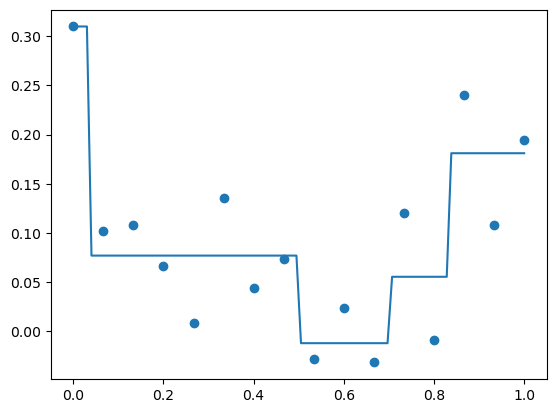

In [7]:
dtr = DecisionTreeRegressor(max_leaf_nodes = 5)
dtr.fit(X_train.reshape(16,1),y_train)
X_test = np.linspace(0,1,100)
y_pred = dtr.predict(X_test.reshape(100,1))

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred)
plt.show()

# 説明変数が二次元の場合

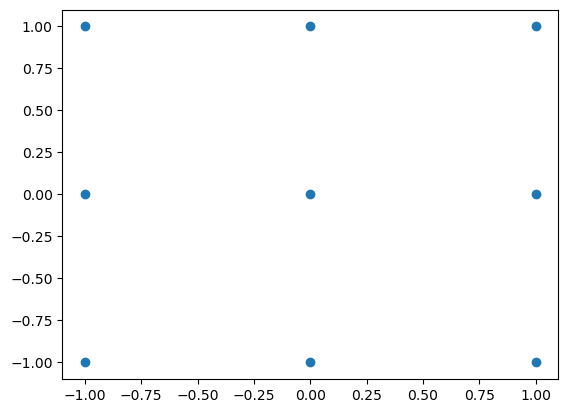

In [8]:
a = np.array([-1,0,1])
b = np.array([-1,0,1])

xx, yy = np.meshgrid(a,b)

X_train = np.c_[xx.ravel(),yy.ravel()]
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

In [9]:
y_train = X_train[:,0]**2 + X_train[:,1]**2
y_train

array([2, 1, 2, 1, 0, 1, 2, 1, 2], dtype=int32)

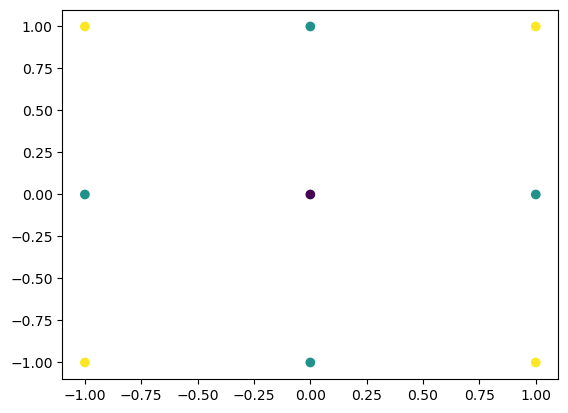

In [10]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [11]:
dtr = DecisionTreeRegressor(max_leaf_nodes = 5,random_state=2)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=5, random_state=2)

In [12]:
axis_test = np.linspace(-1,1,100)
xx,yy = np.meshgrid(axis_test,axis_test)

X_test = np.c_[xx.ravel(),yy.ravel()]
y_pred = dtr.predict(X_test)

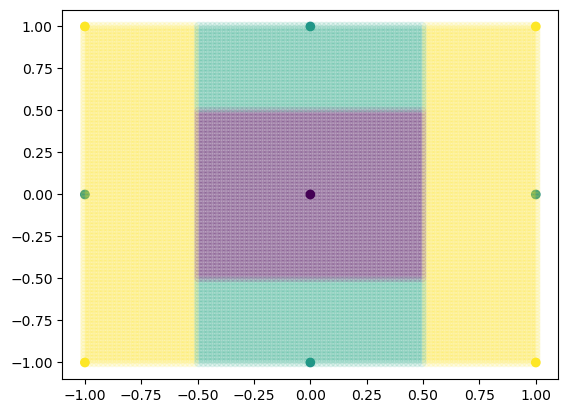

In [14]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, alpha=0.1)
plt.show()

In [15]:
import pandas as pd

In [17]:
oneroom_train = pd.read_csv("./data/ogikubo_oneroom_train.csv")
oneroom_train.head()

,name,value,area,age,distance,bath_toilet_separated,autolock
0,フェリーチェ上井草A,6.0,15.12,0,15,1,1
1,メゾン・ド・荻窪,4.5,12.11,40,7,0,0
2,ＪＲ中央線 荻窪駅 3階建 築40年,4.5,12.11,40,6,0,0
3,フェリーチェ上井草A,6.3,15.12,0,15,1,1
4,グローリア初穂阿佐ヶ谷,6.0,16.65,31,15,0,1


In [18]:
feature_names = ["area","age","bath_toilet_separated","autolock"]
X_train = oneroom_train[feature_names].values
y_train = oneroom_train["value"].values

In [20]:
from sklearn.model_selection import train_test_split
X_learn,X_val, y_learn,y_val = train_test_split(X_train,y_train,random_state=1)

In [24]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000,
                              max_leaf_nodes=40,
                              min_samples_leaf=10,
                              max_features=2)

In [25]:
model.fit(X_learn,y_learn)
pred_learn = model.predict(X_learn)
pred_val = model.predict(X_val)

In [28]:
from sklearn.metrics import r2_score
r2_score(y_learn,pred_learn),r2_score(y_val,pred_val)

(0.758031636336769, 0.9325168714901525)

In [32]:
importances = model.feature_importances_

In [30]:
feature_names

['area', 'age', 'bath_toilet_separated', 'autolock']

In [34]:
index=np.argsort(importances)
index

array([3, 1, 2, 0], dtype=int64)

In [35]:
np.array(feature_names)[index]

array(['autolock', 'age', 'bath_toilet_separated', 'area'], dtype='<U21')

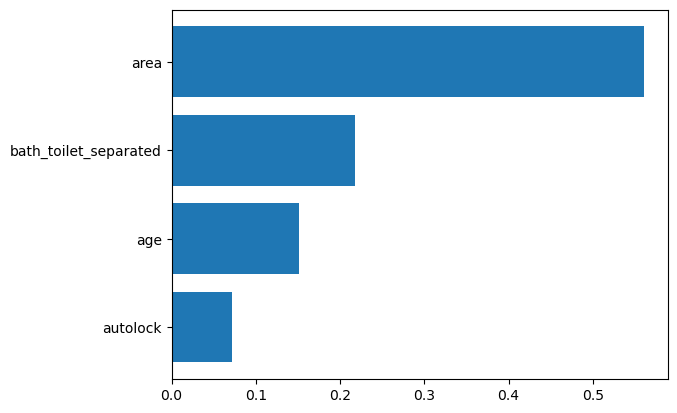

In [36]:
plt.barh(np.array(feature_names)[index],importances[index])
plt.show()